# Data Wrangling with Penguins

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

### Load messy penguin data set
- One .csv file for each species
- Check shape of data frames

In [ ]:
Adelie_df = pd.read_csv('penguins_adelie.csv')
Adelie_df.head()

In [ ]:
Chinstrap_df = pd.read_csv('penguins_chinstrap.csv')
Chinstrap_df.shape

In [ ]:
Gentoo_df = pd.read_csv('penguins_gentoo.csv')
Gentoo_df.shape

The researchers forgot to add the sex of the penguins in the same data set. Load the penguin_sex.csv file as well. Luckily they logged the same individual names.

In [145]:
all_penguins_sex = pd.read_csv('penguins_sex.csv')

In [166]:
all_penguins_sex.head()

,Individual ID,Sex
0,N1A1,MALE
1,N1A2,FEMALE
2,N2A1,FEMALE
3,N2A2,NaN
4,N3A1,FEMALE


## Create one data frame from the 4 above

### 1. Put different species in one Data Frame
- df.append()
- pd.concat()

###  When all data species are in ine data frame set 'Individual ID' as the Index

### 2. Add the penguins sex to the rest of the data
- pd.merge()

#### Load penguin_sex.csv

In [212]:
all_penguins_sex = pd.read_csv('penguins_sex.csv')
all_penguins_sex.set_index('Individual ID')

,Sex
Individual ID,
N1A1,MALE
N1A2,FEMALE
N2A1,FEMALE
N2A2,NaN
N3A1,FEMALE
...,...
N38A2,NaN
N39A1,FEMALE
N39A2,MALE


In [214]:
all_penguins_sex.shape

(344, 2)

#### Join both data frames by Individual ID

In [223]:
df = pd.merge(all_penguins,all_penguins_sex, on = ['Individual ID'], how = 'inner').drop_duplicates()

In [226]:
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Comments,Sex
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,NaN,NaN,Not enough blood for isotopes.,MALE
1,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,NaN,NaN,Not enough blood for isotopes.,FEMALE
2,PAL0910,81,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N1A1,Yes,11/18/09,49.1,14.5,212.0,4625.0,8.35802,-26.27660,NaN,MALE
3,PAL0910,81,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N1A1,Yes,11/18/09,49.1,14.5,212.0,4625.0,8.35802,-26.27660,NaN,FEMALE
4,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,8.94956,-24.69454,NaN,FEMALE


# Missing values

### Visualize empty values first, eg. with a seaborn heatmap
There is also a separate package misigno https://github.com/ResidentMario/missingno

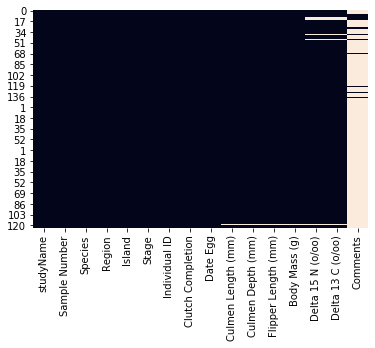

In [14]:
sns.heatmap(all_penguins.isnull(),cbar=False)

### Remove all columns that contain at least 4 missing values
- df.drop()
- df.dropna()

## Let's explore the data answering following questions

### Which species do we have?
- df.unique()

### Which Islands?

### Change species names to more simpler ones
- df.replace()
- 'Adelie Penguin (Pygoscelis adeliae)' to 'Adelie'
- 'Chinstrap penguin (Pygoscelis antarctica)' to 'Chinstrap'
- 'Gentoo penguin (Pygoscelis papua)', to 'Gentoo'

### Print out the biggest and smallest penguins 
- df.describe()
- or Series.max() Series.min()
- Only for Gentoo

### How many Chinstrap penguins do we have?
- df.count()

***

***

## df.groupby

### How many penguins of the different species are male or female?

In [ ]:
df.groupby(['Species', 'Sex']).count()

### Averages the different species male and females?

In [ ]:
df.groupby(['Species', 'Sex']).mean()

### How many penguins of the different species are in the different islands